# Libraries and Settings

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# Import Data

In [216]:
raw = pd.read_csv('../data/zri/Zip_Zri_MultiFamilyResidenceRental.csv',dtype={'RegionName':'object'})
raw.columns = raw.columns.str.replace('RegionName', 'zip')
raw = raw[raw['City'] == 'New York']

In [217]:
region = raw.iloc[:,:7].set_index('zip')
data = pd.concat([raw['zip'],raw.iloc[:,11:-1]],axis=1).set_index('zip')

In [218]:
region.shape

(150, 6)

# Data Cleaning

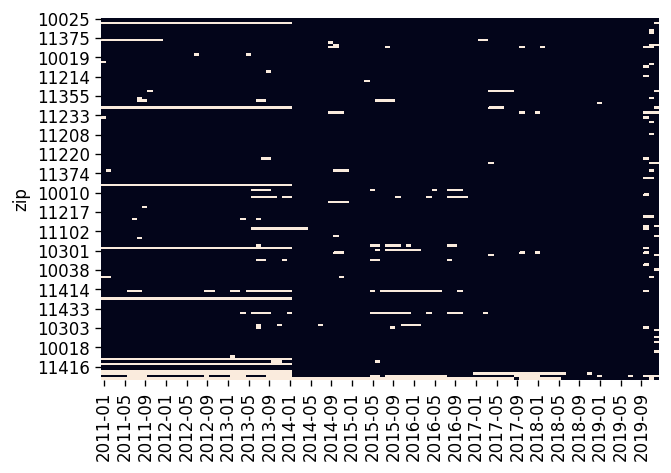

In [219]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
sns.heatmap(data.isnull(), cbar=False)

(array([123.,   9.,   4.,   1.,   1.,   0.,   1.,   0.,   8.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.0412037 , 0.08240741, 0.12361111, 0.16481481,
        0.20601852, 0.24722222, 0.28842593, 0.32962963, 0.37083333,
        0.41203704, 0.45324074, 0.49444444, 0.53564815, 0.57685185,
        0.61805556, 0.65925926, 0.70046296, 0.74166667, 0.78287037,
        0.82407407]),
 <a list of 20 Patch objects>)

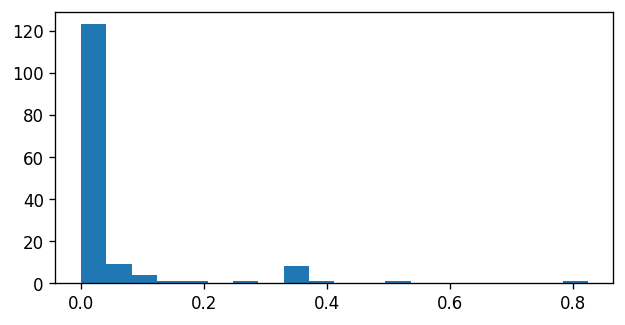

In [220]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.hist(data.isna().mean(axis=1),bins=20)

In [221]:
good = data.isna().mean(axis=1) <= 0.2
region = region[good]
data = data[good]

In [222]:
sns.heatmap(data.isnull(), cbar=False)

In [223]:
ny = data.interpolate(method='linear',limit_direction='both', axis=1)

In [224]:
data

2011-01  2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  \
zip                                                                             
10025   2866.0   2828.0   2799.0   2791.0   2797.0   2823.0   2843.0   2858.0   
10023   2736.0   2675.0   2667.0   2680.0   2692.0   2707.0   2719.0   2738.0   
11226   1590.0   1570.0   1557.0   1549.0   1556.0   1578.0   1596.0   1600.0   
10467   1448.0   1443.0   1431.0   1425.0   1415.0   1405.0   1396.0   1379.0   
10016   2765.0   2692.0   2668.0   2669.0   2688.0   2709.0   2725.0   2749.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
11429   1457.0   1463.0   1464.0   1470.0   1466.0   1474.0   1484.0   1489.0   
10470   1541.0   1538.0   1531.0   1518.0   1493.0   1472.0   1455.0   1431.0   
10302   1362.0   1383.0   1397.0   1399.0   1386.0   1386.0   1391.0   1417.0   
11416   1517.0   1526.0   1532.0   1537.0   1540.0   1543.0   1554.0   1552.0   
11436   1489.0   1498.0   1497.0   1495.0   1489.0   1492.0   1503.0   1508.0   

       2011-09  2011-10  ...  2019-03  2019-04  2019-05  2019-06  2019-07  \
zip                      ...                                                
10025   2882.0   2909.0  ...   3467.0   3484.0   3523.0   3573.0   3622.0   
10023   2759.0   2769.0  ...   3457.0   3449.0   3459.0   3479.0   3491.0   
11226   1599.0   1606.0  ...   2018.0   2023.0   2028.0   2040.0   2054.0   
10467   1367.0   1357.0  ...   1777.0   1774.0   1778.0   1786.0   1792.0   
10016   2767.0   2781.0  ...   3503.0   3515.0   3529.0   3540.0   3543.0   
...        ...      ...  ...      ...      ...      ...      ...      ...   
11429   1495.0   1493.0  ...   2139.0   2118.0   2107.0   2102.0   2087.0   
10470   1416.0   1402.0  ...   1899.0   1909.0   1913.0   1914.0   1921.0   
10302   1447.0   1451.0  ...   1889.0   1882.0   1874.0   1869.0   1874.0   
11416   1551.0   1548.0  ...   2178.0   2179.0   2180.0   2183.0   2188.0   
11436   1511.0   1501.0  ...   2141.0   2138.0   2132.0   2121.0   2109.0   

       2019-08  2019-09  2019-10  2019-11  2019-12  
zip                                                 
10025   3664.0   3698.0   3704.0   3692.0   3715.0  
10023   3510.0   3521.0   3574.0   3608.0   3561.0  
11226   2063.0   2073.0   2125.0   2098.0   2127.0  
10467   1803.0   1818.0   1847.0   1861.0   1860.0  
10016   3551.0   3569.0   3614.0      NaN   3538.0  
...        ...      ...      ...      ...      ...  
11429   2074.0   2070.0   2090.0   2113.0   2111.0  
10470   1927.0   1935.0   1934.0   1929.0   1934.0  
10302   1895.0   1934.0   1982.0   1975.0   2010.0  
11416   2189.0   2189.0   2200.0   2207.0   2211.0  
11436   2094.0   2086.0   2084.0   2119.0   2115.0  

[138 rows x 108 columns]

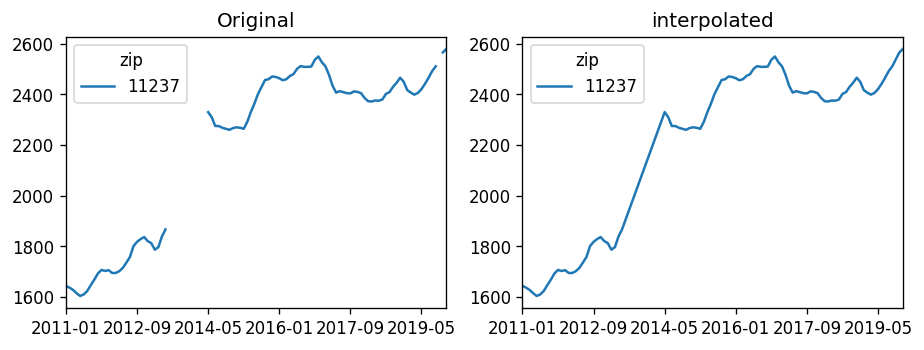

In [225]:
def plot_interpolate(zipcode):
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
    fig, axes = plt.subplots(1, 2)
    data[data.index==zipcode].T.plot(ax=axes[0])
    axes[0].set_title('Original')
    ny[ny.index==zipcode].T.plot(ax=axes[1])
    axes[1].set_title('interpolated')
    
plot_interpolate('11237')

In [226]:
region.to_csv('../data/ny_zip.csv')
ny.to_csv('../data/ny_zri.csv')

# EDA

In [227]:
def get_change(ts_data):
    ts = ts_data.T
    ts_pre = ts.shift()
    return(((ts-ts_pre)/ts_pre).iloc[1:,:].T)

change = get_change(ny)

## Cluster Analysis

In [228]:
from sklearn.cluster import KMeans
from collections import defaultdict

In [229]:
kmeans = KMeans(n_init=40)

In [230]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

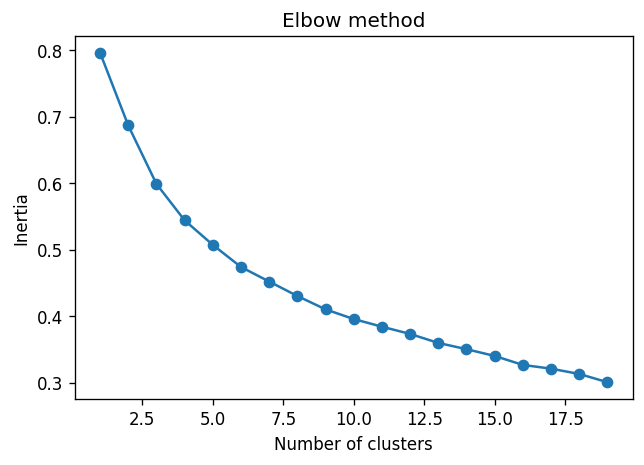

In [193]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plot_inertia(kmeans, change, range(1, 20))

In [282]:
ngroup = 8

def fit_kmeans(ngroup,ts_data):
    kmeans = KMeans(ngroup, n_init=40)
    kmeans.fit(ts_data)

    cluster_groups = kmeans.predict(ts_data)

    similar_by_cluster = defaultdict(list)
    for a, b in zip(cluster_groups, ny.index):
           similar_by_cluster[a].append(b)

    for key,value in similar_by_cluster.items():
        print(f'Group {key}: {len(value)}')
        
    return(cluster_groups, similar_by_cluster)

cluster_groups, similar_by_cluster = fit_kmeans(ngroup, change)

Group 7: 20
Group 0: 23
Group 4: 16
Group 1: 14
Group 5: 28
Group 2: 6
Group 3: 10
Group 6: 21


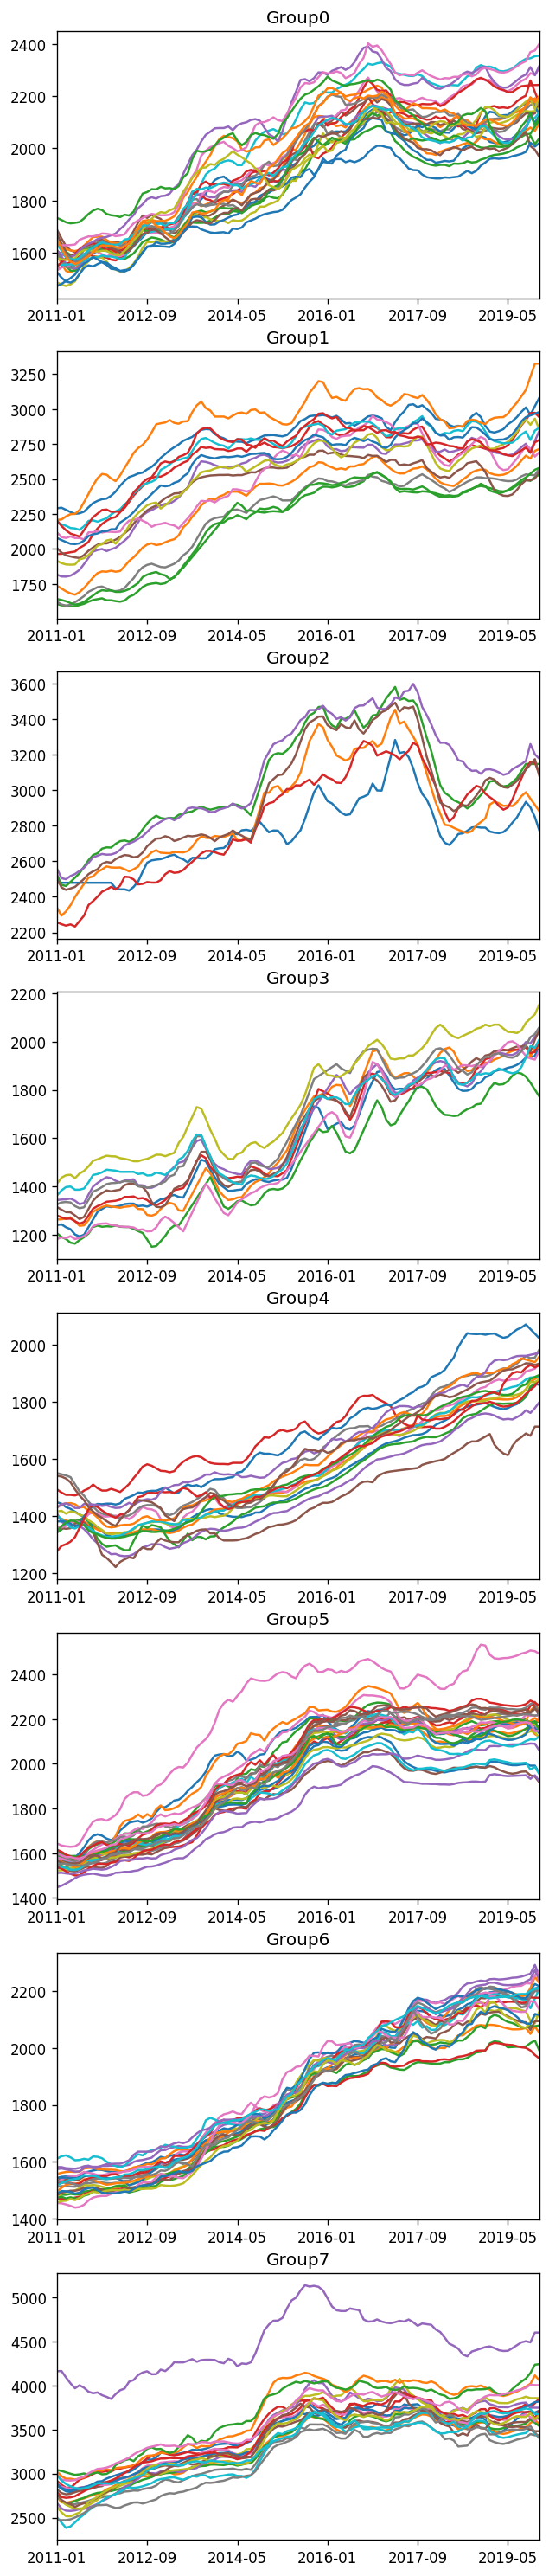

In [283]:
plt.rcParams.update({'figure.figsize':(6,4*ngroup), 'figure.dpi':120})
fig, axes = plt.subplots(ngroup, 1)
for g in range(ngroup):
    for zipcode in similar_by_cluster[g]:
        ny[ny.index==zipcode].T.plot(ax=axes[g])
        axes[g].set_title('Group'+str(g))
        axes[g].legend().set_visible(False)

In [284]:
kmeans_group = pd.DataFrame({'ZipCode':ny.index,'Group':cluster_groups})
# kmeans_group.to_csv('../data/kmeans_group.csv')

In [285]:
kmeans_group

ZipCode  Group
0     10025      7
1     10023      7
2     11226      0
3     10467      4
4     10016      7
..      ...    ...
133   11429      6
134   10470      4
135   10302      3
136   11416      6
137   11436      6

[138 rows x 2 columns]

## Visualization

Reference:
- https://towardsdatascience.com/visualizing-data-at-the-zip-code-level-with-folium-d07ac983db20
- https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps

In [286]:
import folium

In [287]:
ny_geo_all = f'../data/nyu-2451-34509-geojson.json'

m_kmeans = folium.Map(location=[40.730610, -73.935242],zoom_start=11)

folium.Choropleth(
    geo_data=ny_geo_all,
    name='choropleth',
    data=kmeans_group,
    columns=['ZipCode', 'Group'],
    key_on='feature.properties.zcta', # Use 'feature', not 'features'. this seems to be a bug
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = np.arange(ngroup+1),
    legend_name='K-Means Group'
).add_to(m_kmeans)

folium.LayerControl().add_to(m_kmeans)

m_kmeans

In [288]:
m_kmeans.save('../fig/nyc_kmeans_8.html')

In [159]:
rent_zip = pd.DataFrame({'zip':ny.index,'2019':ny.iloc[:,-12:].mean(axis=1)})

In [201]:
ny_geo_all = f'../data/nyu-2451-34509-geojson.json'

m_rent = folium.Map(location=[40.730610, -73.935242],zoom_start=11)

folium.Choropleth(
    geo_data=ny_geo_all,
    name='choropleth',
    data=rent_zip,
    columns=['zip', '2019'],
    key_on='feature.properties.zcta', # Use 'feature', not 'features'. this seems to be a bug
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = 10,
    legend_name='Zillow Rent Index in 2019'
).add_to(m_rent)

folium.LayerControl().add_to(m_rent)

m_rent

In [202]:
m_rent.save('../fig/nyc_2019.html')

In [214]:
rent_zip['2019'].hist(bins=25)
plt.xlabel('Zillow Rent Index')
plt.ylabel('Number of Zip Codes')
plt.title('Histogram of Zillow Rent Index in 2019')

Text(0.5, 1.0, 'Histogram of Zillow Rent Index in 2019')